In [1]:
from libardrone import libardrone
from IPython.display import Image as dispImage, display
from IPython.html.widgets import Image as ImageWidget, HTML
import matplotlib.pyplot as plt
%matplotlib inline
#import pandas as pd
from copy import copy
import time
drone = libardrone.ARDrone(is_ar_drone_2 = True)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
import numpy
from PIL import Image
from IPython.display import Image as dispImage, display
from IPython.html.widgets import Image as ImageWidget, HTML
import json
import StringIO
from copy import copy
ip = get_ipython()

def capture(drone,name):
    with open('/Users/jgoad-admin/Desktop/'+name+'.jpeg','wb') as f:
        image_buffer = drone2JPEG(drone)
        f.write(image_buffer)

def array2PIL(arr, size):
    mode = 'RGBA'
    arr = arr.reshape(arr.shape[0]*arr.shape[1], arr.shape[2])
    if len(arr[0]) == 3:
        arr = numpy.c_[arr, numpy.ones((len(arr),1), numpy.uint8)]
    return Image.frombuffer(mode, size, arr.tostring(), 'raw', mode, 0, 1)


def drone2JPEG(drone):
    data = drone.get_image()
    output = StringIO.StringIO()
    image = array2PIL(data,(data.shape[1],data.shape[0]))
    image.save(output,'jpeg')
    contents = output.getvalue()
    output.close()
    return contents

image_wid = ImageWidget()
telem = HTML()
display(image_wid , telem)
image_buffer = None

run_video = True

telem_data = copy(drone.navdata)
del telem_data[16] 
del telem_data[65535]

psi0 = drone.navdata[0]['psi']


while run_video:
    telem_data = copy(drone.navdata)
    del telem_data[16] 
    del telem_data[65535]
    telem.value = '<pre>{0} {1} {2} {3}</pre>'.format(psi0,telem_data[0]['psi'],abs(telem_data[0]['psi']-psi0),type(abs(telem_data[0]['psi']-psi0)))
    image_buffer = drone2JPEG(drone) # "Izza 'jpeg'"
    image_wid.value = image_buffer
    
    ip.kernel.do_one_iteration()

KeyboardInterrupt: 

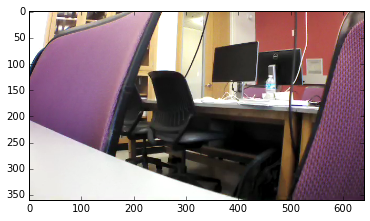

In [3]:
data = drone.get_image()
plt.imshow(data)

In [10]:
time.sleep(3)
drone.takeoff()
time.sleep(5)

drone.speed = 0.2
drone.move_forward()
time.sleep(2)

drone.hover()
time.sleep(2)

drone.speed = 0.8
drone.turn_angle(180)

drone.hover()
time.sleep(2)

drone.speed = 0.2
drone.move_forward()
time.sleep(1)

drone.hover()
time.sleep(2)

drone.land()
drone.halt()
drone = libardrone.ARDrone(is_ar_drone_2 = True)

In [2]:
drone.navdata[0]

{'altitude': 0,
 'battery': 78,
 'ctrl_state': 1,
 'num_frames': 0,
 'phi': -2,
 'psi': -146,
 'theta': 0,
 'vx': 0.0,
 'vy': 0.0,
 'vz': 0.0}

In [3]:
drone.land()

In [7]:
drone.reset()

In [24]:
drone.halt()

In [7]:
drone.navdata[0]

{'altitude': 0,
 'battery': 0,
 'ctrl_state': 0,
 'num_frames': 0,
 'phi': 0,
 'psi': 0,
 'theta': 0,
 'vx': 0,
 'vy': 0,
 'vz': 0}

In [80]:
time.time()

1428091820.255575

In [32]:
time.clock()-t

0.3058240000000003

In [16]:
telem = HTML()
display(telem)
psi0 = drone.navdata[0]['psi']
while True:
    time.sleep(0.1)
    telem.value = '<pre> |psi-psi0| = {0} psi = {1} psi0 = {2} clock: {3}</pre>'.format(drone.navdata[0]['psi']-psi0,drone.navdata[0]['psi'],psi0,time.clock())
    time.sleep(0.1)

KeyboardInterrupt: 

In [23]:
telem = HTML()
display(telem)

data =[]

t0 = time.time()
drone.takeoff()
while time.time()-t0 < 10:
    time.sleep(0.1)
    telem.value = '<pre> vx = {0} vy = {1} vz = {2} alt = {3} clock: {4}</pre>'.format(drone.navdata[0]['vx'],drone.navdata[0]['vy'],drone.navdata[0]['vy'],drone.navdata[0]['altitude'],time.clock())
    time.sleep(0.1)
    data.append((drone.navdata[0]['vx'],drone.navdata[0]['vy'],drone.navdata[0]['vy'],drone.navdata[0]['altitude'],time.time()))
drone.land()
drone.halt()
drone = libardrone.ARDrone(is_ar_drone_2 = True)
data = pd.DataFrame(data)
data.columns =['vx','vy','vz','alt','clock']

In [11]:
from zmq.eventloop import IOLoop 
loop = IOLoop.instance()